In [6]:
%load_ext autoreload
%autoreload 2

try:
    from google.colab import drive
    drive.mount('/content/drive')
    import os
    GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Vgg16'
    GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
    print(os.listdir(GOOGLE_DRIVE_PATH))
    import sys
    sys.path.append(GOOGLE_DRIVE_PATH)
except:
    pass

import time, os

import torch
from torch import Tensor
import torchvision
import matplotlib.pyplot as plt
import statistics
import random
import time
import math
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 10
import toolset as ts
from toolset import *
from toolset.utils import *
from toolset.data import *
from toolset.helper import *
from toolset.solver import *
data_dict = ts.data.preprocess_cifar10(cuda=True, dtype=torch.float64, flatten=False,show_examples=False)
print('Train data shape: ', data_dict['X_train'].shape)
print('Train labels shape: ', data_dict['y_train'].shape)
print('Validation data shape: ', data_dict['X_val'].shape)
print('Validation labels shape: ', data_dict['y_val'].shape)
print('Test data shape: ', data_dict['X_test'].shape)
print('Test labels shape: ', data_dict['y_test'].shape)
from convolutional_networks import DeepConvNet
from fully_connected_networks import adam
from convolutional_networks import *
import gc


small_data = {
  'X_train': data_dict['X_train'][:350],
  'y_train': data_dict['y_train'][:350],
  'X_val': data_dict['X_val'][:1],
  'y_val': data_dict['y_val'][:1],
}

half = {
  'X_train': data_dict['X_train'][:data_dict['X_train'].shape[0]//2],
  'y_train': data_dict['y_train'][:data_dict['X_train'].shape[0]//2],
  'X_val': data_dict['X_val'][:data_dict['X_val'].shape[0]//2],
  'y_val': data_dict['y_val'][:data_dict['X_val'].shape[0]//2],
}

input_dims = data_dict['X_train'].shape[1:]

if torch.cuda.is_available:
    print('Good to go!')
else:
    print('Please set GPU via Edit -> Notebook Settings.')
    
def clear(x=None):
    x = None
    gc.collect(),torch.cuda.empty_cache()
    # 不会影响当前有效（非None）的变量。
    # gc.collect() 会清理掉Python环境中所有未被引用的对象，而 torch.cuda.empty_cache() 会清理掉PyTorch在CUDA中的缓存
clear()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Train data shape:  torch.Size([40000, 3, 32, 32])
Train labels shape:  torch.Size([40000])
Validation data shape:  torch.Size([10000, 3, 32, 32])
Validation labels shape:  torch.Size([10000])
Test data shape:  torch.Size([10000, 3, 32, 32])
Test labels shape:  torch.Size([10000])
Good to go!


In [2]:
net = None
# reset_seed(666)  # 模型加载时也用了torch，保证相同
net = VggNet(
    num_filters = (64, 64, 
                   128, 128, 
                   256, 256, 256, 256,
                   512, 512, 512, 512,
                   512, 512, 512, 512
                   ),
    max_pools = (1, 3, 7, 11, 15),
    num_FC = (4096, 4096, 10),
    weight_scale = 'kaiming',
    kaiming_ratio = 3.5e-3,
    # dropout=0.5,
    reg = 1e-4,
    device = 'cuda'
)
net.check_loss(half)
clear()
# net = VggNet(input_dims=input_dims,
#              weight_scale='kaiming',
#              device='cuda',
#              reg=1e-4)

NameError: name 'VggNet' is not defined

In [3]:


test_net = None
test_net = VggNet(
    num_filters=(8, 8, 8, 8, 8),
    max_pools=(0,1,2,3,4),
    num_FC=(72,10),
    weight_scale='kaiming',
    kaiming_ratio = 3.5e-3,
    reg=1e-5,
    dropout=0.5,
    device='cuda'
)

solver = Solver(test_net, small_data,
                num_epochs=1000, batch_size=50,
                optim_config={
                'learning_rate': 0.01,
                },
                update_rule=adam,
                verbose=True, device='cuda',print_every=1000, )
solver.train(time_limit=20)


使用 kaiming 初始化
torch.Size([50, 8, 16, 16])
torch.Size([50, 8, 8, 8])
torch.Size([50, 8, 4, 4])
torch.Size([50, 8, 2, 2])
torch.Size([50, 8, 1, 1])
(用时 1.79s; 迭代次数1 / 7000) loss: 2.302542
torch.Size([100, 8, 16, 16])
torch.Size([100, 8, 8, 8])
torch.Size([100, 8, 4, 4])
torch.Size([100, 8, 2, 2])
torch.Size([100, 8, 1, 1])
torch.Size([100, 8, 16, 16])
torch.Size([100, 8, 8, 8])
torch.Size([100, 8, 4, 4])
torch.Size([100, 8, 2, 2])
torch.Size([100, 8, 1, 1])
torch.Size([100, 8, 16, 16])
torch.Size([100, 8, 8, 8])
torch.Size([100, 8, 4, 4])
torch.Size([100, 8, 2, 2])
torch.Size([100, 8, 1, 1])
torch.Size([50, 8, 16, 16])
torch.Size([50, 8, 8, 8])
torch.Size([50, 8, 4, 4])
torch.Size([50, 8, 2, 2])
torch.Size([50, 8, 1, 1])
torch.Size([1, 8, 16, 16])
torch.Size([1, 8, 8, 8])
torch.Size([1, 8, 4, 4])
torch.Size([1, 8, 2, 2])
torch.Size([1, 8, 1, 1])
(Epoch 0 / 1000, train 准确率: 8.57%, val准确率: 0.00%
torch.Size([50, 8, 16, 16])
torch.Size([50, 8, 8, 8])
torch.Size([50, 8, 4, 4])
torch.Size([50

KeyboardInterrupt: 

In [1]:

net = None
reset_seed(0)  # 模型加载时也用了torch，保证相同
net = VggNet(
    num_filters = (64, 64, 
                   128, 128, 
                   256, 256, 256, 256,
                   512, 512, 512, 512,
                   512, 512, 512, 512
                   ),
    max_pools = (1, 3, 7, 11, 15),
    num_FC = (4096, 4096, 10),
    weight_scale = 'kaiming',
    # dropout=0.5,
    kaiming_ratio=0.1,
    reg = 0,
    device = 'cuda'
)
net.check_loss(small_data)

solver = Solver(net, small_data,
                num_epochs=100, batch_size=50,
                optim_config={
                'learning_rate': 1e-4,
                },
                update_rule=adam,
                verbose=True, device='cuda',print_every=5, lr_decay=0.95)

NameError: name 'reset_seed' is not defined

In [5]:
reset_seed(0)
solver.train(time_limit=60)

(用时 0.21s; 迭代次数1 / 700) loss: 1.788636
(Epoch 4 / 100, train 准确率: 8.86%, val准确率: 0.00%
(用时 1.76s; 迭代次数6 / 700) loss: 1.851925
(Epoch 5 / 100, train 准确率: 10.86%, val准确率: 0.00%
(用时 3.29s; 迭代次数11 / 700) loss: 1.956572
(Epoch 6 / 100, train 准确率: 21.43%, val准确率: 100.00%
(用时 4.84s; 迭代次数16 / 700) loss: 1.794357
(用时 5.80s; 迭代次数21 / 700) loss: 1.887284
(Epoch 7 / 100, train 准确率: 14.86%, val准确率: 0.00%
(用时 7.31s; 迭代次数26 / 700) loss: 1.786200
(Epoch 8 / 100, train 准确率: 19.71%, val准确率: 100.00%
(用时 8.85s; 迭代次数31 / 700) loss: 1.772721
(Epoch 9 / 100, train 准确率: 18.86%, val准确率: 0.00%
(用时 10.36s; 迭代次数36 / 700) loss: 1.924033
(用时 11.35s; 迭代次数41 / 700) loss: 1.726103
(Epoch 10 / 100, train 准确率: 12.86%, val准确率: 0.00%
(用时 12.89s; 迭代次数46 / 700) loss: 1.752044
(Epoch 11 / 100, train 准确率: 12.57%, val准确率: 0.00%
(用时 14.44s; 迭代次数51 / 700) loss: 1.691396
(用时 15.39s; 迭代次数56 / 700) loss: 1.781888
(Epoch 12 / 100, train 准确率: 25.71%, val准确率: 0.00%
(用时 17.00s; 迭代次数61 / 700) loss: 1.772774
(Epoch 13 / 100, train 准确率: 1

KeyboardInterrupt: 

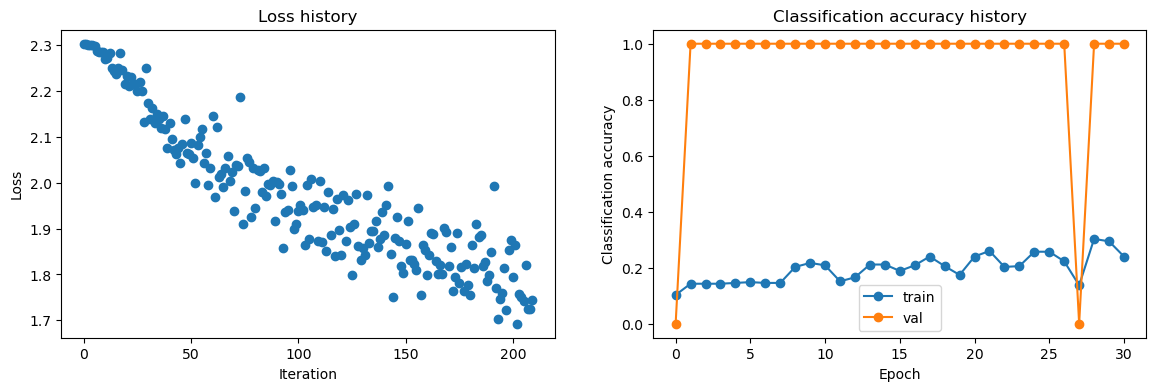

In [4]:
helper.plot_solver(solver)

In [6]:
solver.checkpoint_name = "fuck"
solver._save_checkpoint()

保存检查点到:fuck_epoch_13.pkl


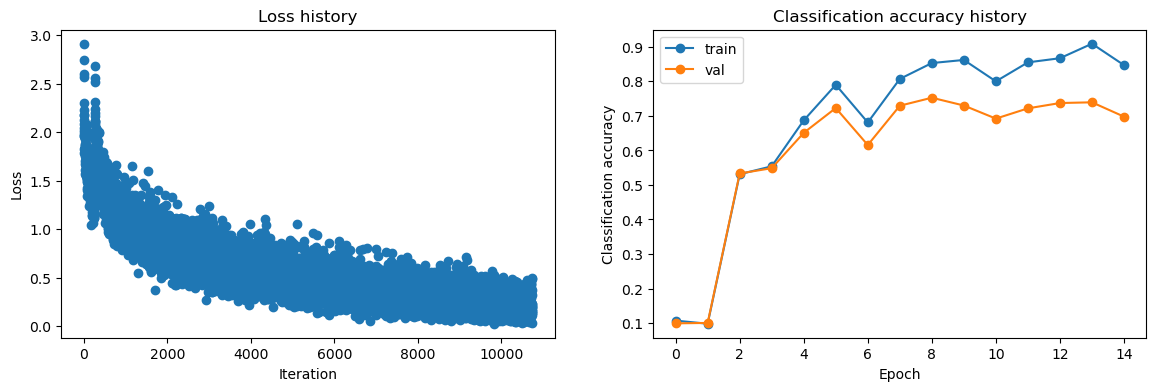

In [7]:
helper.plot_solver(solver)

In [13]:
p = 0.5
for i in range(10):
    print(((torch.rand([10,4]) > p) / (1 - p)).sum())

tensor(42.)
tensor(38.)
tensor(42.)
tensor(42.)
tensor(50.)
tensor(40.)
tensor(28.)
tensor(44.)
tensor(56.)
tensor(26.)
